<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/8_2_Mnist2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 숫자인식은 딥러닝의 가장 기초적인 예제입니다. 

아래의 텐서플로우 공식싸이트의 예제를 참고하세요

https://www.tensorflow.org/tutorials/quickstart/beginner



In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
import pandas as pd
y_train_df = pd.DataFrame(y_train)

In [ ]:
y_train_df.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [ ]:
y_train_df.value_counts().sort_values()

5    5421
4    5842
8    5851
6    5918
0    5923
9    5949
2    5958
3    6131
7    6265
1    6742
dtype: int64

In [ ]:
y_train_df.value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

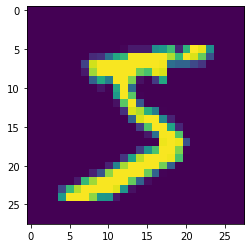

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

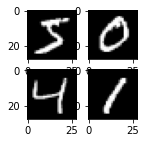

In [ ]:
# 여러개 출력하기
plt.figure(figsize=(2,2))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(x_train[i], cmap='gray')

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

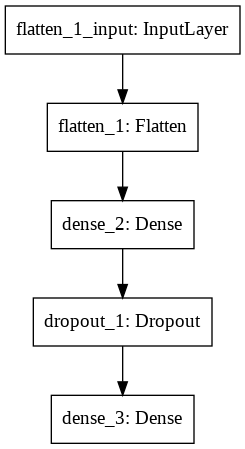

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
res = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4923 - accuracy: 0.8560 - val_loss: 0.1451 - val_accuracy: 0.9560
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1477 - accuracy: 0.9565 - val_loss: 0.0971 - val_accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1087 - accuracy: 0.9676 - val_loss: 0.0908 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0881 - accuracy: 0.9723 - val_loss: 0.0832 - val_accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0750 - accuracy: 0.9764 - val_loss: 0.0813 - val_accuracy: 0.9751
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9799 - val_loss: 0.0721 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0573 - accuracy: 0.9817 - val_loss: 0.0703 - val_accuracy:

In [ ]:
res.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
res.history['loss']

[0.2967252731323242,
 0.14196570217609406,
 0.1055312305688858,
 0.08677440136671066,
 0.07533901929855347,
 0.0649605467915535,
 0.058682385832071304,
 0.051839184015989304,
 0.048223480582237244,
 0.04271715134382248]

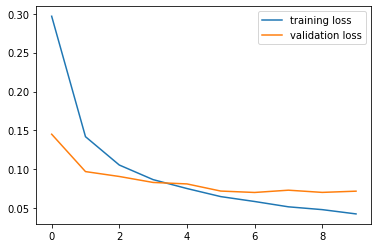

In [ ]:
plt.plot(res.history['loss'], label='training loss')
plt.plot(res.history['val_loss'], label = 'validation loss')
plt.legend()